# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [1]:
# This cell is finished

from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [5]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image, gaussFilter, boundary='symm', mode='same')
filterResponseSobelX = signal.convolve2d(image, sobelX, boundary='symm', mode='same')
filterResponseSobelY = signal.convolve2d(image, sobelY, boundary='symm', mode='same')

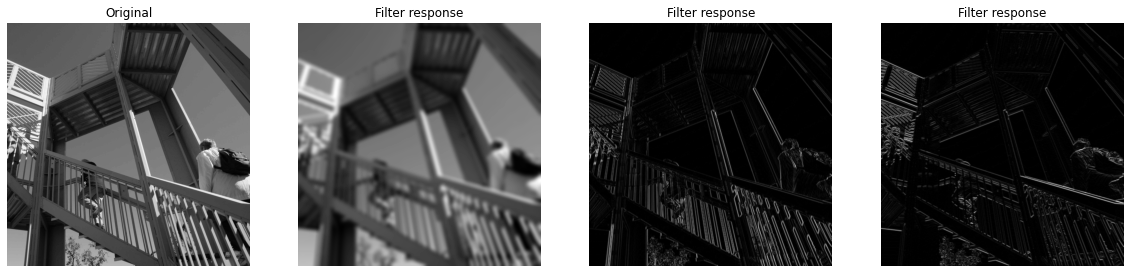

In [6]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

<span style="color:navy">The Gaussian filter is used for blurring the image and removing detail and noise.</span>

<span style="color:navy">The SobelX filter is used to detect edges in vertical direction.</span>

<span style="color:navy">The SobelY filter is used to detect edges in horizontal direction.</span>


Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?

<span style="color:navy">The size of the original image is 512*512. </span>

<span style="color:navy">The ascent image from scipy.misc is a grayscale image, so it has only one channel.</span>

 <span style="color:navy">A color image in RGB color space has three channels (Red, Green, Blue), and a color image in RGBA color space has four channels (Red, Green, Blue, Alpha).</span>

Question 3: What is the size of the different filters?

<span style="color:navy">The size of Gaussian filter is 15*15</span>
    
<span style="color:navy">The size of SobelX filter is 3*3</span>

<span style="color:navy">The size of SobelY filter is 3*3</span>

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?

<span style="color:navy">If mode ‘same’ is used for the convolution, the output is the same size as the input image. This is because the ‘same’ mode pads the input image with zeros at the borders, so the convolution operation can be applied at every pixel of the original image.</span>

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 

<span style="color:navy">If mode ‘valid’ is used for the convolution, the output size is smaller than the input. Specifically, if the input is an image of size (W1 x H1) and the filter is of size (W2 x H2), then the output will be of size ((W1-W2+1) x (H1-H2+1)). This is because the ‘valid’ mode only allows the filter to move inside the image, without going off the edge.</span>

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?

<span style="color:navy">‘Valid’ convolutions can be a problem for CNNs with many layers because they reduce the size of the output at each layer. If the image is significantly reduced in size through the layers, important information may be lost. Also, if the image becomes too small, it may not be possible to apply further convolutions.</span>


In [9]:
# Your code for checking sizes of image and filter responses
print(f"Size of the original image: {image.shape}")

print(f"Size of the Gaussian filter: {gaussFilter.shape}")
print(f"Size of the SobelX filter: {sobelX.shape}")
print(f"Size of the SobelY filter: {sobelY.shape}")


print(f"Size of the Gaussian filter response: {filterResponseGauss.shape}")
print(f"Size of the SobelX filter response: {filterResponseSobelX.shape}")
print(f"Size of the SobelY filter response: {filterResponseSobelY.shape}")


Size of the original image: (512, 512)
Size of the Gaussian filter: (15, 15)
Size of the SobelX filter: (3, 3)
Size of the SobelY filter: (3, 3)
Size of the Gaussian filter response: (512, 512)
Size of the SobelX filter response: (512, 512)
Size of the SobelY filter response: (512, 512)


##  Part 3: Get a graphics card

Skip this part if you run on a CPU (recommended)

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [ ]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

##  Part 4: How fast is the graphics card?

Question 7: Why are the filters used for a color image of size 7 x 7 x 3, and not 7 x 7 ? 

<span style="color:navy">Filters used for a color image are of size 7 x 7 x 3 and not 7 x 7 because each of the 3 channels of the color image (Red, Green, Blue) needs to be convolved with the filter. Hence, the depth of the filter is 3, matching the number of channels in the image.</span>

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?
    
<span style="color:navy">The ‘Conv2D’ layer performs a 2D convolution operation. It is similar to the function signal.convolve2d we just tested, but it operates over 3D inputs (height, width, channels) and produces 3D outputs. The ‘Conv2D’ layer also includes a bias term for each output channel and applies a non-linear activation function to the output.</span>

Question 9: Do you think that a graphics card, compared to the CPU, is equally faster for convolving a batch of 1,000 images, compared to convolving a batch of 3 images? Motivate your answer.

<span style="color:navy">Generally, a graphics card (GPU) is faster than a CPU for convolving a batch of images, regardless of the batch size. This is because GPUs are designed for parallel processing and can perform many operations simultaneously. However, the speedup might not be linear with the increase in batch size due to memory constraints and overhead of data transfer between CPU and GPU. Therefore, while a GPU is likely to be faster for convolving a batch of 1,000 images compared to a batch of 3 images, it might not be 333 times faster.</span>

##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [7]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

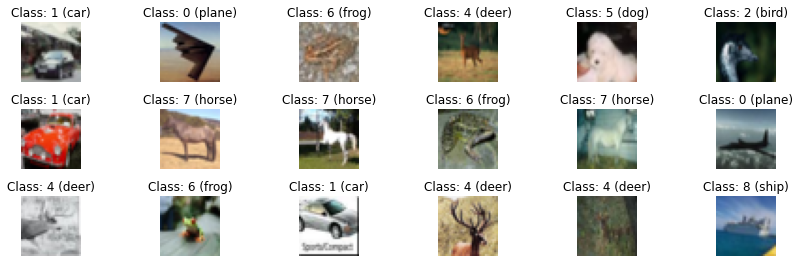

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [9]:
from sklearn.model_selection import train_test_split

# Your code for splitting the dataset
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.25, random_state=42)

# Print the size of training data, validation data and test data
print("Training data size: ", Xtrain.shape)
print("Validation data size: ", Xval.shape)
print("Test data size: ", Xtest.shape)

Training data size:  (7500, 32, 32, 3)
Validation data size:  (2500, 32, 32, 3)
Test data size:  (2000, 32, 32, 3)


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [10]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [11]:
from tensorflow.keras.utils import to_categorical

# Print shapes before converting the labels
print("Shape of Ytrain before converting: ", Ytrain.shape)
print("Shape of Yval before converting: ", Yval.shape)
print("Shape of Ytest before converting: ", Ytest.shape)


# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain = to_categorical(Ytrain, num_classes=len(classes))
Yval = to_categorical(Yval, num_classes=len(classes))
Ytest = to_categorical(Ytest, num_classes=len(classes))

# Print shapes after converting the labels
print("Shape of Ytrain after converting: ", Ytrain.shape)
print("Shape of Yval after converting: ", Yval.shape)
print("Shape of Ytest after converting: ", Ytest.shape)

Shape of Ytrain before converting:  (7500, 1)
Shape of Yval before converting:  (2500, 1)
Shape of Ytest before converting:  (2000, 1)
Shape of Ytrain after converting:  (7500, 10)
Shape of Yval after converting:  (2500, 10)
Shape of Ytest after converting:  (2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/) , it relates to how many classes you have.

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [12]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import categorical_crossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01, dropout_rate = 0.5):

    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Conv2D(n_filters, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization(momentum=0.75))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    
    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
        model.add(Conv2D(n_filters * (2**(i+1)), (3, 3), activation='relu', padding='same'))
        model.add(BatchNormalization(momentum=0.75))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        #if use_dropout:
        #    model.add(Dropout(0.5))
    
    # Add flatten layer
    model.add(Flatten())
    
    # Add intermediate dense layers
    for i in range(n_dense_layers):
        model.add(Dense(n_nodes, activation='relu'))
        model.add(BatchNormalization(momentum=0.75))
        if use_dropout:
            model.add(Dropout(dropout_rate))
        
    # Add final dense layer
    model.add(Dense(10, activation='softmax'))
   
    # Compile model
    model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    
    return model

In [13]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers

In [14]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model1 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, learning_rate=0.01)

# Train the model  using training data and validation data
history1 = model1.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, validation_data=(Xval, Yval))

Epoch 1/20
75/75 [==============================] - 7s 76ms/step - loss: 2.8460 - accuracy: 0.3452 - val_loss: 1.7525 - val_accuracy: 0.4588
Epoch 2/20
75/75 [==============================] - 5s 70ms/step - loss: 1.4619 - accuracy: 0.5067 - val_loss: 1.4807 - val_accuracy: 0.5028
Epoch 3/20
75/75 [==============================] - 5s 73ms/step - loss: 1.1733 - accuracy: 0.5852 - val_loss: 1.3960 - val_accuracy: 0.5228
Epoch 4/20
75/75 [==============================] - 5s 71ms/step - loss: 1.0448 - accuracy: 0.6265 - val_loss: 1.2516 - val_accuracy: 0.5744
Epoch 5/20
75/75 [==============================] - 5s 72ms/step - loss: 0.9294 - accuracy: 0.6719 - val_loss: 1.2838 - val_accuracy: 0.5720
Epoch 6/20
75/75 [==============================] - 5s 71ms/step - loss: 0.8353 - accuracy: 0.7028 - val_loss: 1.3142 - val_accuracy: 0.5840
Epoch 7/20
75/75 [==============================] - 5s 72ms/step - loss: 0.7704 - accuracy: 0.7251 - val_loss: 1.3377 - val_accuracy: 0.5736
Epoch 8/20
75

In [15]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest, Ytest, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 2.9239
Test accuracy: 0.5570


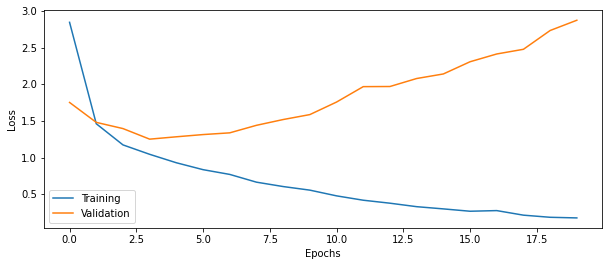

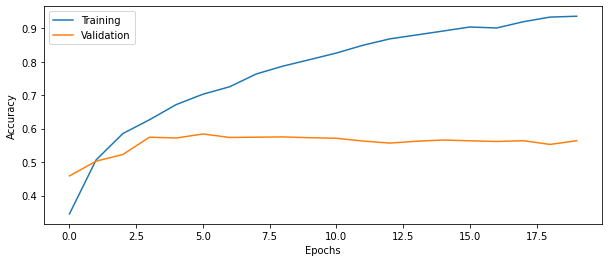

In [16]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 

<span style="color:navy">Test accuracy is 0.5570, the model is better than random.</span>

Question 10: How big is the difference between training and test accuracy?

<span style="color:navy">The difference between training and test accuracy is 0.3787. which is quite large and it also indicates overfitting.</span>

Question 11: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?
    
<span style="color:navy">We need to use a smaller batch size because CNNs are more computationally intensive than DNNs. Using a smaller batch size allows the model to make updates to the weights more frequently, which can lead to faster convergence. Additionally, it can also provide a regularizing effect and help prevent overfitting. However, it’s a trade-off as smaller batch sizes can also lead to less stable convergence and the possibility of getting stuck in local minima. The optimal batch size often depends on the specific problem and the computational resources available.</span>

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [17]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model2 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=1, learning_rate=0.01)

# Train the model  using training data and validation data
history2 = model2.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, validation_data=(Xval, Yval))

Epoch 1/20
75/75 [==============================] - 7s 74ms/step - loss: 1.6686 - accuracy: 0.4103 - val_loss: 1.4439 - val_accuracy: 0.4848
Epoch 2/20
75/75 [==============================] - 5s 72ms/step - loss: 1.2836 - accuracy: 0.5412 - val_loss: 1.3292 - val_accuracy: 0.5164
Epoch 3/20
75/75 [==============================] - 5s 72ms/step - loss: 1.0851 - accuracy: 0.6088 - val_loss: 1.2428 - val_accuracy: 0.5660
Epoch 4/20
75/75 [==============================] - 5s 72ms/step - loss: 0.9269 - accuracy: 0.6739 - val_loss: 1.2989 - val_accuracy: 0.5604
Epoch 5/20
75/75 [==============================] - 5s 72ms/step - loss: 0.7310 - accuracy: 0.7471 - val_loss: 1.5227 - val_accuracy: 0.5492
Epoch 6/20
75/75 [==============================] - 5s 72ms/step - loss: 0.5956 - accuracy: 0.7859 - val_loss: 1.3974 - val_accuracy: 0.5872
Epoch 7/20
75/75 [==============================] - 5s 73ms/step - loss: 0.4256 - accuracy: 0.8509 - val_loss: 1.6257 - val_accuracy: 0.5784
Epoch 8/20
75

In [18]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(Xtest, Ytest, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 2.8297
Test accuracy: 0.5585


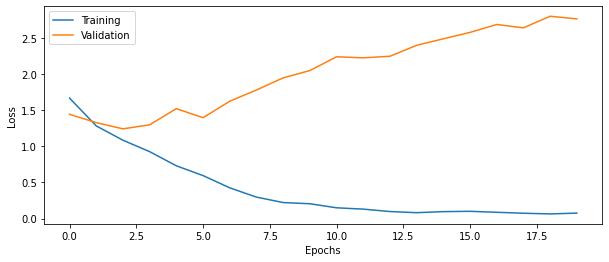

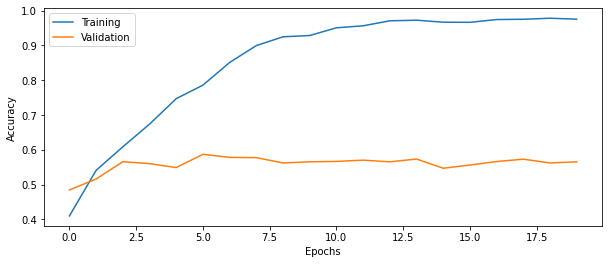

In [19]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [18]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model3 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, learning_rate=0.01)

# Train the model  using training data and validation data
history3 = model3.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, validation_data=(Xval, Yval))

Epoch 1/20
75/75 [==============================] - 10s 98ms/step - loss: 1.7236 - accuracy: 0.3771 - val_loss: 1.4908 - val_accuracy: 0.4476
Epoch 2/20
75/75 [==============================] - 8s 105ms/step - loss: 1.3374 - accuracy: 0.5057 - val_loss: 1.3049 - val_accuracy: 0.5256
Epoch 3/20
75/75 [==============================] - 8s 107ms/step - loss: 1.1482 - accuracy: 0.5775 - val_loss: 1.2540 - val_accuracy: 0.5660
Epoch 4/20
75/75 [==============================] - 8s 112ms/step - loss: 0.9877 - accuracy: 0.6428 - val_loss: 1.2036 - val_accuracy: 0.5696
Epoch 5/20
75/75 [==============================] - 8s 108ms/step - loss: 0.8284 - accuracy: 0.7020 - val_loss: 1.1936 - val_accuracy: 0.5960
Epoch 6/20
75/75 [==============================] - 8s 104ms/step - loss: 0.6861 - accuracy: 0.7600 - val_loss: 1.2514 - val_accuracy: 0.6012
Epoch 7/20
75/75 [==============================] - 8s 106ms/step - loss: 0.5395 - accuracy: 0.8108 - val_loss: 1.3677 - val_accuracy: 0.5972
Epoch 

In [19]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest, Ytest, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 2.4707
Test accuracy: 0.5910


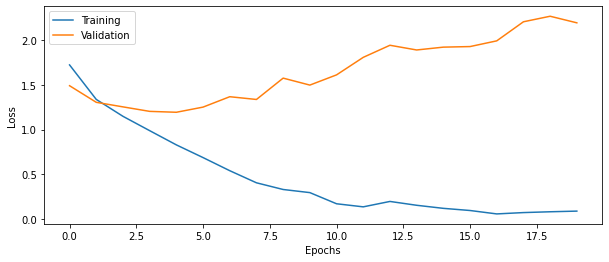

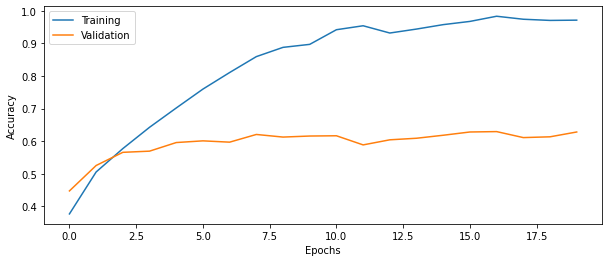

In [20]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 12: How many trainable parameters does your network have? Which part of the network contains most of the parameters?

<span style="color:navy">The number of trainable parameters of our model is 124180, The part of the network that contains most of the parameters in our model is conv2d_7 (Conv2D) with 73856 parameters. </span>

Question 13: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 

<span style="color:navy">If data_format="channels_last": the input to a Conv2D layer is a 4D tensor with shape (batch_size, height, width, channels), and the output is also a 4D tensor with shape (batch_size, new_height, new_width, filters)</span>

<span style="color:navy">If data_format="channels_first": the input to a Conv2D layer is a 4D tensor with shape (batch_size, channels, height, width), and the output is also a 4D tensor with shape (batch_size, new_height, new_width, filters)</span>
    
<span style="color:navy">The dimensions new_height and new_width depend on the kernel size, stride, and padding used in the Conv2D layer.</span>

Question 14: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/

<span style="color:navy">Yes, the batch size is always the first dimension of each 4D tensor in Keras. This is also known as the “channels-last” data format.</span>

Question 15: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?

<span style="color:navy">If a convolutional layer that contains 128 filters is applied to an input with 32 channels, the number of channels in the output will be 128. Each filter produces one feature map, so the number of filters determines the number of output channels.</span>

Question 16: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?

<span style="color:navy">Because each filter is applied to each input channel separately. So, if the input has n channels, each filter has n sets of coefficients. Therefore, the total number of parameters is number of filters * number of coefficients per filter * number of input channels + number of filters (for biases).</span>

Question 17: How does MaxPooling help in reducing the number of parameters to train?

<span style="color:navy">MaxPooling helps in reducing the number of parameters to train by downsampling the input. It reduces the spatial dimensions (i.e., width and height) of the input by taking the maximum value over a window for each channel, which results in a reduced amount of parameters for the next layers.</span>

In [21]:
# Print network architecture

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_6 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                      

##  Part 14: Dropout regularization

Add dropout regularization between each intermediate dense layer, dropout probability 50%.

Question 18: How much did the test accuracy improve with dropout, compared to without dropout?

<span style="color:navy">The test accuracy with dropout compared to without dropout improved 0.0022(0.6130-0.5910). Dropout can help prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time, which helps introduce noise into the training process.</span>

Question 19: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?

<span style="color:navy">Other types of regularization that can be applied include L1 and L2 regularization, and early stopping. L2 regularization can be added to the convolutional layers by including it as a keyword argument in the layer’s constructor.</span>

## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [23]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model4 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, use_dropout= True, learning_rate=0.01)

# Train the model  using training data and validation data
history4 = model4.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, validation_data=(Xval, Yval))

Epoch 1/20
75/75 [==============================] - 8s 86ms/step - loss: 2.0458 - accuracy: 0.2891 - val_loss: 1.5780 - val_accuracy: 0.4004
Epoch 2/20
75/75 [==============================] - 6s 85ms/step - loss: 1.5751 - accuracy: 0.4088 - val_loss: 1.4018 - val_accuracy: 0.4824
Epoch 3/20
75/75 [==============================] - 6s 86ms/step - loss: 1.4228 - accuracy: 0.4748 - val_loss: 1.3741 - val_accuracy: 0.4892
Epoch 4/20
75/75 [==============================] - 7s 89ms/step - loss: 1.3086 - accuracy: 0.5179 - val_loss: 1.2971 - val_accuracy: 0.5224
Epoch 5/20
75/75 [==============================] - 7s 90ms/step - loss: 1.1982 - accuracy: 0.5665 - val_loss: 1.1918 - val_accuracy: 0.5704
Epoch 6/20
75/75 [==============================] - 7s 93ms/step - loss: 1.0902 - accuracy: 0.6043 - val_loss: 1.2395 - val_accuracy: 0.5672
Epoch 7/20
75/75 [==============================] - 7s 93ms/step - loss: 0.9771 - accuracy: 0.6491 - val_loss: 1.1248 - val_accuracy: 0.6044
Epoch 8/20
75

In [24]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest, Ytest, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.8146
Test accuracy: 0.6130


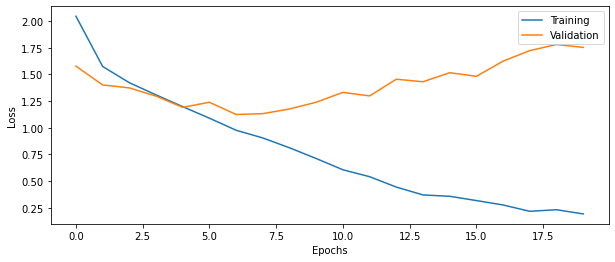

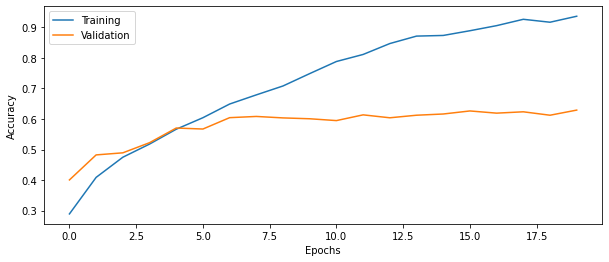

In [25]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 20: How high test accuracy can you obtain? What is your best configuration?

<span style="color:navy">Please see below results.</span>

## Your best config

In [20]:
import optuna
print(optuna.__version__)

3.6.1


In [30]:
def optuna_objective(trial):
    
    n_conv_layers = trial.suggest_int("n_conv_layers",2,4,step=2) 
    n_filters = trial.suggest_categorical("n_filters",[16, 32, 64])
    n_dense_layers = trial.suggest_int("n_dense_layers",1,6,step= 1)
    n_nodes = trial.suggest_categorical("n_nodes",[50, 64, 128, 256])
    learning_rate = trial.suggest_float("learning_rate",0.0001,1,log=True) 
    use_dropout = trial.suggest_categorical("use_dropout", [True, False])
    epochs = trial.suggest_int("epochs",20,30,step=2)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 100])
    dropout_rate = trial.suggest_float("dropout_rate",0.2,0.8,log=False)
    
    model5 = build_CNN(input_shape=input_shape, n_conv_layers=n_conv_layers, n_filters=n_filters, n_dense_layers=n_dense_layers, n_nodes=n_nodes,
              use_dropout= use_dropout, learning_rate=learning_rate, dropout_rate=dropout_rate )
    model5.fit(Xtrain, Ytrain, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(Xval,Yval))
    score = model5.evaluate(Xtest, Ytest)
    
    return score[1]

In [31]:
from optuna.samplers import TPESampler
study = optuna.create_study(sampler=TPESampler(), direction='maximize')
study.optimize(optuna_objective, n_trials=30, timeout=1800)

[I 2024-04-28 19:11:40,047] A new study created in memory with name: no-name-4f9b1029-4034-4302-b6f2-4366e2479a60


63/63 [==============================] - 1s 14ms/step - loss: 1.9547 - accuracy: 0.6155


[I 2024-04-28 19:15:58,709] Trial 0 finished with value: 0.6154999732971191 and parameters: {'n_conv_layers': 2, 'n_filters': 32, 'n_dense_layers': 2, 'n_nodes': 256, 'learning_rate': 0.001037944058513945, 'use_dropout': True, 'epochs': 26, 'batch_size': 64, 'dropout_rate': 0.33328293439424783}. Best is trial 0 with value: 0.6154999732971191.


63/63 [==============================] - 1s 9ms/step - loss: 10830939136.0000 - accuracy: 0.0970


[I 2024-04-28 19:19:35,461] Trial 1 finished with value: 0.09700000286102295 and parameters: {'n_conv_layers': 2, 'n_filters': 16, 'n_dense_layers': 5, 'n_nodes': 50, 'learning_rate': 0.9831291791056702, 'use_dropout': True, 'epochs': 26, 'batch_size': 16, 'dropout_rate': 0.6596198538037037}. Best is trial 0 with value: 0.6154999732971191.


63/63 [==============================] - 1s 9ms/step - loss: 2.1052 - accuracy: 0.4750


[I 2024-04-28 19:21:43,322] Trial 2 finished with value: 0.4749999940395355 and parameters: {'n_conv_layers': 2, 'n_filters': 16, 'n_dense_layers': 6, 'n_nodes': 50, 'learning_rate': 0.00043823689569635936, 'use_dropout': False, 'epochs': 24, 'batch_size': 100, 'dropout_rate': 0.7876958903414271}. Best is trial 0 with value: 0.6154999732971191.


63/63 [==============================] - 2s 27ms/step - loss: 1.5726 - accuracy: 0.6085


[I 2024-04-28 19:29:43,102] Trial 3 finished with value: 0.6085000038146973 and parameters: {'n_conv_layers': 2, 'n_filters': 64, 'n_dense_layers': 1, 'n_nodes': 64, 'learning_rate': 0.00020025060735919052, 'use_dropout': False, 'epochs': 26, 'batch_size': 32, 'dropout_rate': 0.23109065816464738}. Best is trial 0 with value: 0.6154999732971191.


63/63 [==============================] - 1s 14ms/step - loss: 1.7405 - accuracy: 0.5260


[I 2024-04-28 19:43:37,770] Trial 4 finished with value: 0.5260000228881836 and parameters: {'n_conv_layers': 2, 'n_filters': 32, 'n_dense_layers': 3, 'n_nodes': 50, 'learning_rate': 0.00011062554036232579, 'use_dropout': False, 'epochs': 22, 'batch_size': 16, 'dropout_rate': 0.3381120661316921}. Best is trial 0 with value: 0.6154999732971191.


In [32]:
print('The highest accuracy for test set is {:.5f}.'.format(study.best_value))

The highest accuracy for test set is 0.61550.


In [33]:
print("The hyperparameters are:")
study.best_params

The hyperparameters are:


{'n_conv_layers': 2,
 'n_filters': 32,
 'n_dense_layers': 2,
 'n_nodes': 256,
 'learning_rate': 0.001037944058513945,
 'use_dropout': True,
 'epochs': 26,
 'batch_size': 64,
 'dropout_rate': 0.33328293439424783}

In [34]:
# Setup some training parameters

# Build model
model5 = build_CNN(input_shape=input_shape, n_conv_layers=study.best_params['n_conv_layers'], n_filters=study.best_params['n_filters'], n_dense_layers=study.best_params['n_dense_layers'], n_nodes=study.best_params['n_nodes'],
              use_dropout= study.best_params['use_dropout'], learning_rate=study.best_params['learning_rate'], dropout_rate=study.best_params['dropout_rate'] )

# Train the model  using training data and validation data
history5 = model5.fit(Xtrain, Ytrain, epochs=study.best_params['epochs'], batch_size=study.best_params['batch_size'], verbose=0, validation_data=(Xval,Yval))


In [35]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 16ms/step - loss: 1.9015 - accuracy: 0.6215
Test loss: 1.9015
Test accuracy: 0.6215


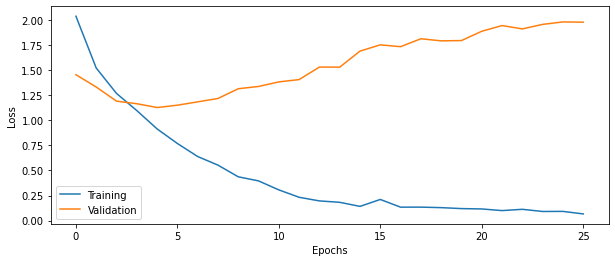

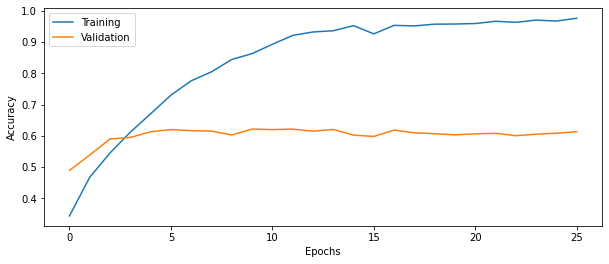

In [36]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 21: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

<span style="color:navy">The test accuracy for the rotated test images is 0.2560, while the accuracy for the test images without rotation is 0.6215. This means that the CNN model’s accuracy decreases significantly when the test images are rotated. The difference in accuracy is due to the fact that the CNN model was trained on non-rotated images, and it has not learned to recognize the patterns in the rotated images. This also shows that the CNN model is not very good at generalizing to rotated images.</span>

In [17]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

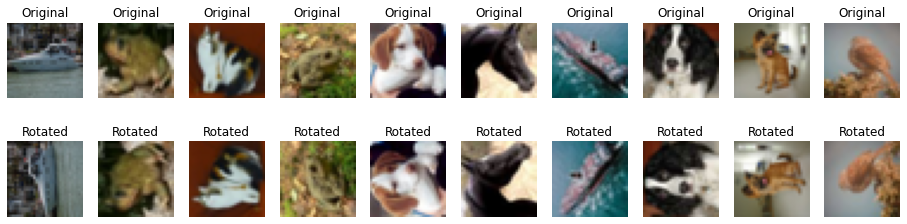

In [18]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [44]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(Xtest_rotated, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 15ms/step - loss: 5.2581 - accuracy: 0.2560
Test loss: 5.2581
Test accuracy: 0.2560


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator , the .flow(x,y) functionality

Make sure to use different subsets for training and validation when you setup the flows, otherwise you will validate on the same data...

In [14]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [25]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(rotation_range=30, horizontal_flip=True, vertical_flip=True, validation_split=0.2)

# Setup a flow for training data, assume that we can fit all images into CPU memory
train_flow = datagen.flow(Xtrain, Ytrain, batch_size=32, seed= 12345, subset='training')


# Setup a flow for validation data, assume that we can fit all images into CPU memory
val_flow = datagen.flow(Xtrain, Ytrain, batch_size=32, seed=12345, subset='validation')





## Part 18: What about big data?

Question 22: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

<span style="color:navy">Then it's needed to use the flow_from_directory method of the ImageDataGenerator class instead of the flow method. This method reads images from a directory in real time, which allows you to work with large datasets that cannot fit in memory. However, the disadvantage of this approach is that reading images from the disk in real time can be slower than working with images already loaded into memory. This could potentially slow down the training process. </span>

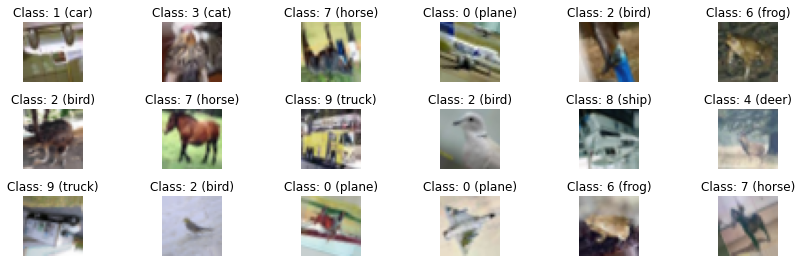

In [16]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size
    
This is required since with a generator, the fit function will not know how many examples your original dataset has.

Question 23: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. We are here talking about the number of training epochs required to reach a certain accuracy, and not the training time in seconds. What parameter is necessary to change to perform more training?

<span style="color:navy">The training accuracy with augmentation generally increases slower than without augmentation. This is because augmentation effectively increases the diversity and size of the training set, making the learning task more challenging and thus requiring more epochs to reach the same accuracy. To perform more training, we can increase the steps_per_epoch parameter</span>

Question 24: What other types of image augmentation can be applied, compared to what we use here?

<span style="color:navy">Shifting (both horizontal and vertical), shearing, zooming, channel shifting (for color images), brightness changes, and adding Gaussian noise. These augmentations can help the model generalize better by exposing it to a wider variety of transformations.</span>

In [26]:
# Setup some training parameters
batch_size = 100
#epochs = 200
epochs =26
input_shape = Xtrain.shape[1:]

# Build model (your best config)
model6 = build_CNN(input_shape=input_shape, n_conv_layers=2, n_filters=32, n_dense_layers=2, n_nodes=256,
              use_dropout= True, learning_rate=0.001, dropout_rate=0.3 )

validation_split=0.2

steps_per_epoch = len(Xtrain)*(1 - validation_split)/batch_size
validation_steps = len(Xtrain)*validation_split/batch_size
    
# Train the model using on the fly augmentation
history6 = model6.fit(train_flow, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=val_flow, validation_steps=validation_steps)

Epoch 1/26
80/80 [==============================] - 7s 59ms/step - loss: 2.4756 - accuracy: 0.2555 - val_loss: 1.8343 - val_accuracy: 0.3656
Epoch 2/26
80/80 [==============================] - 5s 59ms/step - loss: 2.0921 - accuracy: 0.3055 - val_loss: 1.7263 - val_accuracy: 0.3984
Epoch 3/26
80/80 [==============================] - 5s 61ms/step - loss: 1.9731 - accuracy: 0.3270 - val_loss: 1.6669 - val_accuracy: 0.4141
Epoch 4/26
80/80 [==============================] - 6s 71ms/step - loss: 1.8545 - accuracy: 0.3594 - val_loss: 1.5796 - val_accuracy: 0.3922
Epoch 5/26
80/80 [==============================] - 4s 54ms/step - loss: 1.7837 - accuracy: 0.3605 - val_loss: 1.5438 - val_accuracy: 0.4594
Epoch 6/26
80/80 [==============================] - 5s 58ms/step - loss: 1.7481 - accuracy: 0.3848 - val_loss: 1.5428 - val_accuracy: 0.4469
Epoch 7/26
80/80 [==============================] - 5s 58ms/step - loss: 1.7141 - accuracy: 0.3922 - val_loss: 1.5481 - val_accuracy: 0.4516
Epoch 8/26
80

In [27]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.3012
Test accuracy: 0.5255
Test loss: 2.3909
Test accuracy: 0.2735


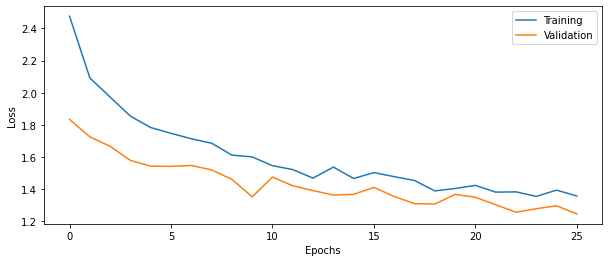

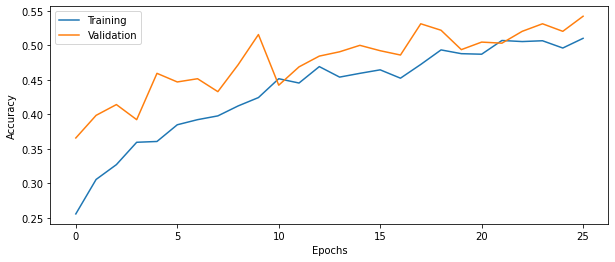

In [28]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [23]:
# Find misclassified images
y_pred=model6.predict(Xtest) 
y_pred=np.argmax(y_pred,axis=1)

y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

63/63 [==============================] - 1s 14ms/step


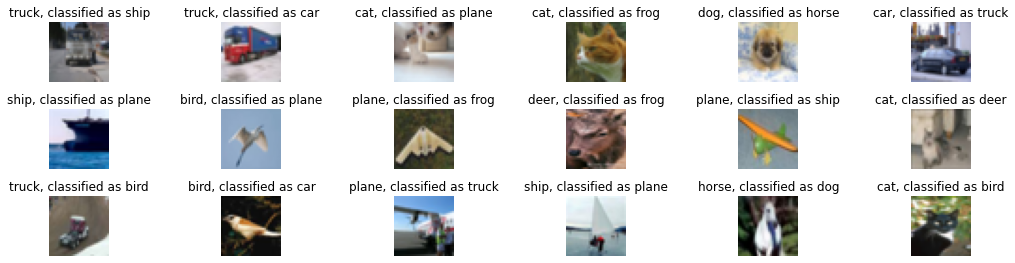

In [24]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 25: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

<span style="color:navy">It cannot be directly applied to images of another size. This is because the dimensions of the input are fixed in the architecture of the model, specifically in the input layer and any subsequent fully connected layers.</span>

Question 26: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

<span style="color:navy">Yes, it could use fully convolutional networks (FCNs). FCNs replace the dense layers in a typical CNN with convolutional layers, allowing for inputs of any size.</span>

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 27: How many convolutional layers does ResNet50 have? 

<span style="color:navy">ResNet50 has 50 layers, of which 48 are convolutional layers.</span>

Question 28: How many trainable parameters does the ResNet50 network have? 

<span style="color:navy">25583592 trainable parameters</span>

Question 29: What is the size of the images that ResNet50 expects as input?

<span style="color:navy">ResNet50 expects input images of size 224 x 224.</span>

Question 30: Using the answer to question 28, explain why the second derivative is seldom used when training deep networks.

<span style="color:navy">The second derivative is seldom used when training deep networks because it requires computing and storing the Hessian matrix, which is a square matrix of second-order partial derivatives. This matrix is often too large to fit in memory for deep networks and is computationally expensive to calculate.</span>

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function 

Useful functions

`image.load_img` in tensorflow.keras.preprocessing

`image.img_to_array` in tensorflow.keras.preprocessing

`ResNet50` in tensorflow.keras.applications.resnet50

`preprocess_input` in tensorflow.keras.applications.resnet50

`decode_predictions` in tensorflow.keras.applications.resnet50

`expand_dims` in numpy


In [11]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice. 
# The preprocessing should transform the image to a size that is expected by the CNN.

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import numpy as np
import os

# Load pre-trained ResNet50
model = ResNet50(weights='imagenet')


# Get a list of all images in the directory
current_path = os.getcwd()
image_dir = os.fsencode(f"{current_path}/pic")

image_list = [os.fsdecode(img) for img in os.listdir(image_dir) if os.fsdecode(img).endswith(".jpg")]


for image_file in image_list:
    
    print('The image to be predicted is:', image_file)
    
    # Load image
    img = image.load_img(f"pic/{image_file}", target_size=(224, 224))
    
    # Convert image to array
    x = image.img_to_array(img)
    
    # Expand dimensions so the image has shape (1, 224, 224, 3)
    x = np.expand_dims(x, axis=0)
    
    # Preprocess the image
    x = preprocess_input(x)
    
    # Make predictions
    preds = model.predict(x)
    
    # Decode the predictions
    decoded_preds = decode_predictions(preds, top=1)[0]
    
    # Print the predictions
    print('Predicted:', decoded_preds)


The image to be predicted is: dog.jpg
1/1 [==============================] - 1s 1s/step
Predicted: [('n02099601', 'golden_retriever', 0.72901624)]
The image to be predicted is: apple.jpg
1/1 [==============================] - 0s 145ms/step
Predicted: [('n07768694', 'pomegranate', 0.46203396)]
The image to be predicted is: airplane.jpg
1/1 [==============================] - 0s 143ms/step
Predicted: [('n02690373', 'airliner', 0.99222773)]
The image to be predicted is: car.jpg
1/1 [==============================] - 0s 135ms/step
Predicted: [('n04285008', 'sports_car', 0.810785)]
The image to be predicted is: fish.jpg
1/1 [==============================] - 0s 135ms/step
Predicted: [('n01443537', 'goldfish', 0.34769005)]


In [46]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   